<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/CODSOFT/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES PREDICTION**

### **Description**
As a vehicle salesperson, you would like to create a model that can estimate the overall amount that consumers would spend given the following characteristics:
customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth

![picture](https://drive.google.com/uc?export=view&id=18kQuMVhg_mQFEXcDQuv8MS-60HOR1ZZ3)

Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d yashpaloswal/ann-car-sales-price-prediction

ann-car-sales-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/ann-car-sales-price-prediction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing the Essential Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
import plotly.express as px
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

### **Creating DataFrame**

In [5]:
df=pd.read_csv('car_purchasing.csv',encoding='latin1')
s,k=df.shape
print('Number of Rows: ',s)
print('Number of Columns: ',k)

Number of Rows:  500
Number of Columns:  9


### **Exploring the DataFrame**

In [6]:
df.head(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [7]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


### **Checking for NULL**

In [9]:
# Checking for null value so that Data Impuation can be done
df.isnull().mean()*100

customer name          0.0
customer e-mail        0.0
country                0.0
gender                 0.0
age                    0.0
annual Salary          0.0
credit card debt       0.0
net worth              0.0
car purchase amount    0.0
dtype: float64

### **Dropping Unwanted Columns**

In [10]:
df.drop(['customer name','customer e-mail','country','gender'],axis=1,inplace=True)

### **Correlation Matrix**

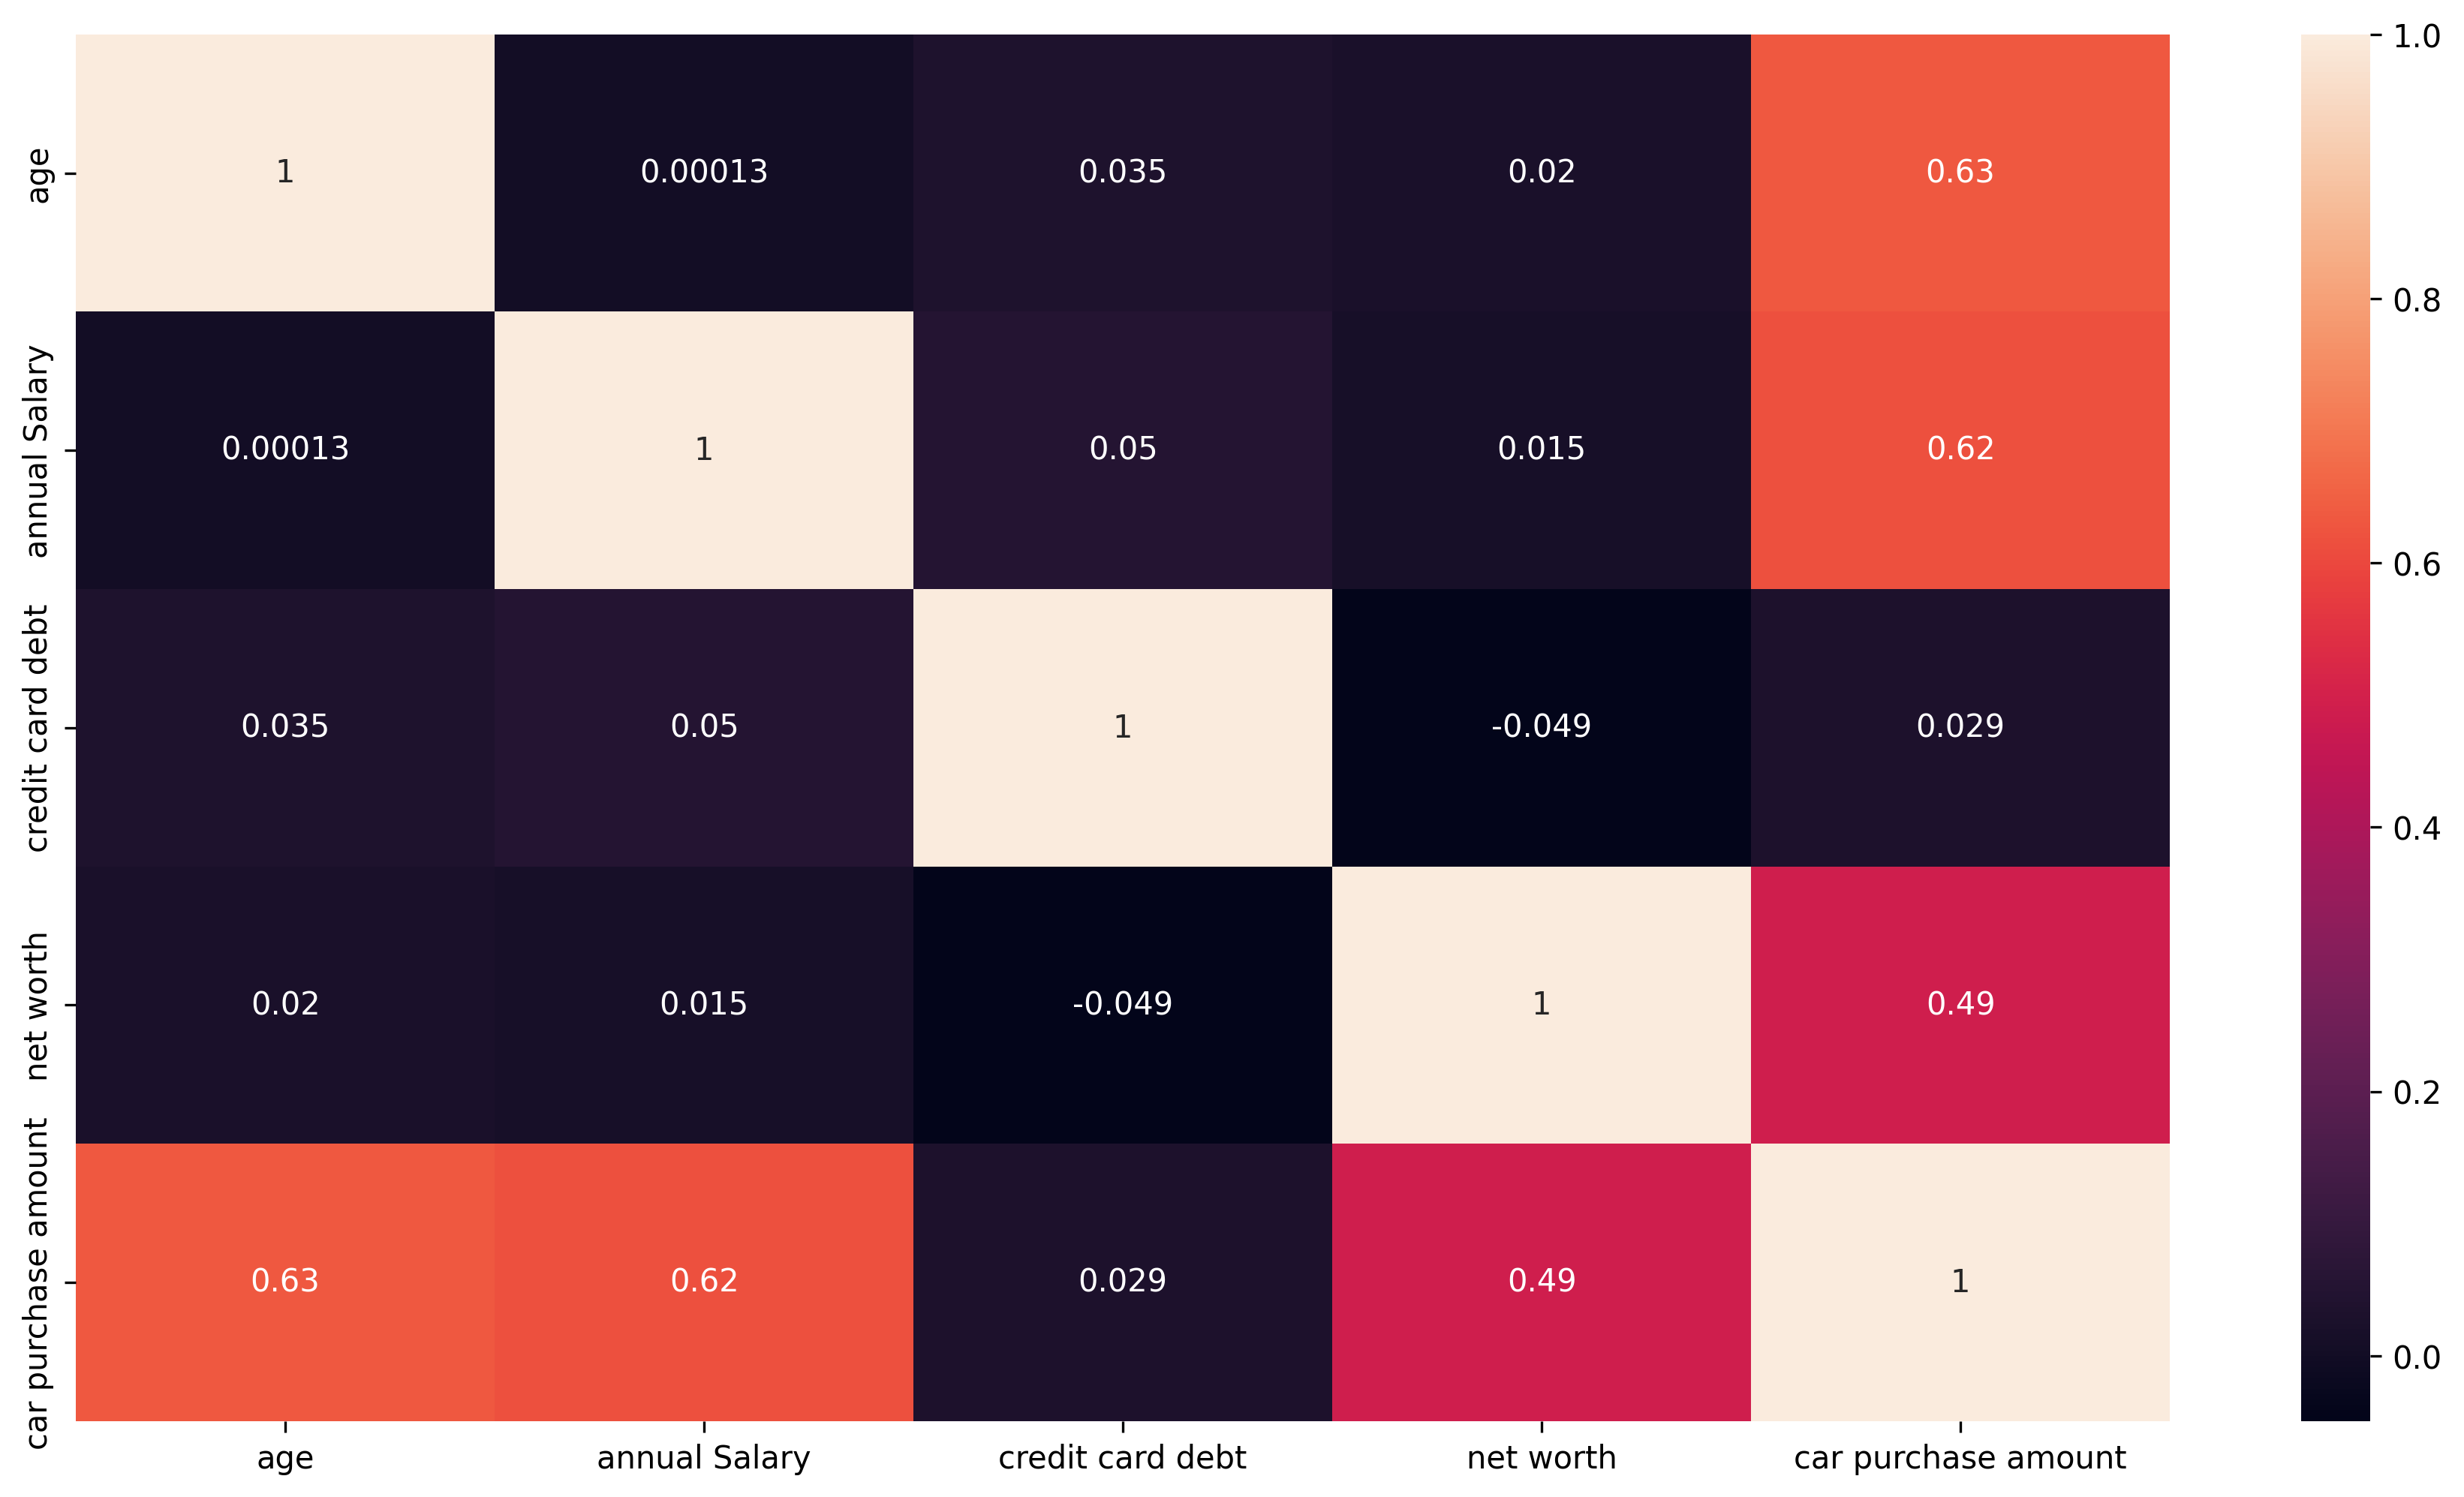

In [11]:
fig=plt.figure(figsize=(15,8),dpi=300)
sns.heatmap(df.corr(), annot = True)
plt.show()

### **Visualising the Relationship**

In [12]:
# visualize the relationship between the amount spent by networth on car
figure = px.scatter(data_frame = df, x="car purchase amount",y="net worth", size="net worth", trendline="ols")
figure.show()

In [13]:
# visualize the relationship between the amount spent by credit card debt on car
figure = px.scatter(data_frame = df, x="car purchase amount",y="credit card debt", size="credit card debt", trendline="ols")
figure.show()

In [14]:
# visualize the relationship between the amount spent by annual salary on car
figure = px.scatter(data_frame = df, x="car purchase amount",y="annual Salary", size="annual Salary", trendline="ols")
figure.show()

In [15]:
# visualize the relationship between the amount spent by age on car
figure = px.scatter(data_frame = df, x="car purchase amount",y="age", size="age", trendline="ols")
figure.show()

Out of all the amount spent on car purchase amount, the age factor and annual salary impacts the car price the most

In [16]:
correlation = df.corr()
print(correlation["car purchase amount"].sort_values(ascending=False))

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
Name: car purchase amount, dtype: float64


### **Splitting Dataset**

In [17]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

### **Normalising the Dataset**

In [18]:
scale=MinMaxScaler()
scale.fit_transform(x,y)

array([[0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [0.53462305, 0.51713347, 0.46690159, 0.45198622]])

### **Test Train Dataset**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    random_state = 0)

### **Linear Regression**

In [20]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### **Validation**

In [21]:
validation_score=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error', cv=3)
validation_score

array([-2.39491006, -1.76942141, -2.31132236])

In [22]:
#mean validation score
np.mean(validation_score)

-2.1585512750353675

### **Predicted Values by Linear Regression**

In [23]:
y_pred= lr.predict(x_test)
print("predicted values :\n",y_pred)

predicted values :
 [38951.87918785 43401.55826664 29415.22342999 52151.41930877
 38241.50097749 53014.75529852 60528.32373006 59538.5000034
 37714.35362478 31300.08307504 46847.94451407 56973.64234689
 53993.68719412 70879.53521821 27887.75527446 31528.28305874
 47979.95068708 58668.63383651 42371.77391466 10091.72460515
 48516.51546379 37181.78016951 46324.41353086 27589.67025297
 68925.58333657 43897.68724157 43405.12916997 46714.20636668
 61594.506059   58235.10876991 48515.13804536 42591.75266894
 54757.71292068 42774.41054657 63081.70067104 60117.49482722
 35716.67351472 59983.89921038 42794.4176344  42998.45810665
 59621.67522929 34215.75512088 30421.13693314 37304.23861778
 41355.07279255 45115.06801707 44577.39294506 53497.82214485
 38175.03292483 33637.74214469 35727.79437119 41027.77920828
 50188.41913702 53658.09038322 39765.67345409 28699.63522882
 43503.96619557 57430.81615387 45507.9833875  59095.27825071
 38502.76297656 48025.168889   42703.46388006 47720.28157831
 4232

In [24]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('mean_squared_error')
print(mse)
print('\n')
print('mean_absolute_error')
print(mae)
print('\n')
print('rmse')
print(rmse)

mean_squared_error
2.401506502724234


mean_absolute_error
1.2124468586873554


rmse
1.5496794838689174


### **Accuracy Score and other Metrics by Linear Regression**

In [25]:
score=r2_score(y_test,y_pred)
print('Accuracy: ',score)

Accuracy:  0.9999999792368126


In [26]:
x_test1=[[41,62812,11609,238961]]
predict1=lr.predict(x_test1)
predict1

array([34603.93964298])

In [27]:
print('Coefficient :','\n',lr.coef_) #slope or m or B1
print('\n')
print('Regressor :','\n',lr.intercept_)

Coefficient : 
 [ 8.41569411e+02  5.62337785e-01 -1.87055019e-05  2.89831864e-02]


Regressor : 
 -42147.60120857502


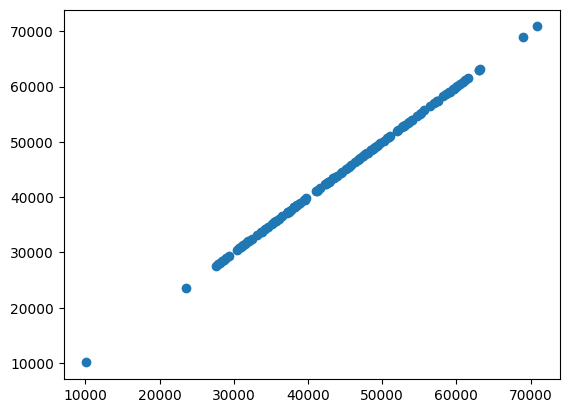

In [28]:
# less linear relationship:- model performed okay,
# if it was linear then excellent model
plt.scatter(y_test,y_pred)
plt.show()

Note: - Straight Line therefore good trained model

In [29]:
residual=y_test-y_pred
print(residual)

90     3.340002
254    0.007853
283    2.423510
445   -1.001449
461    1.561303
         ...   
430    0.540305
49    -0.402777
134    1.256257
365   -0.471673
413    3.121370
Name: car purchase amount, Length: 125, dtype: float64


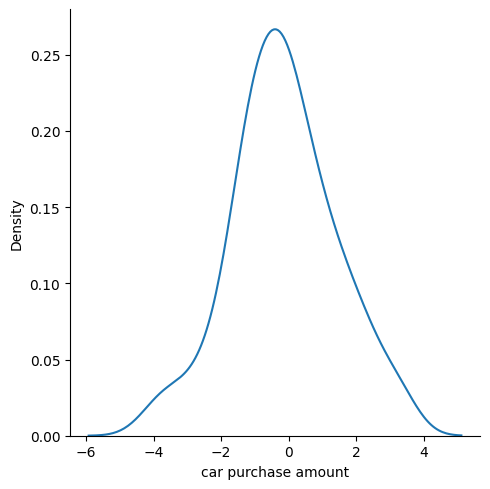

In [30]:
# plotting residual
sns.displot(residual,kind='kde')
plt.show()

Note: - Normal Distribution is achieved

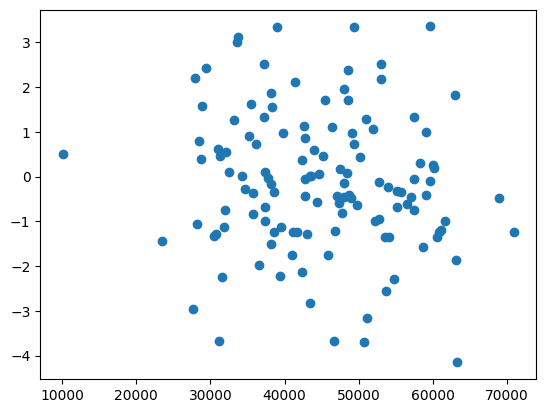

In [31]:
#scatter plot with respect to prediction and residual
plt.scatter(y_pred,residual)
plt.show()

Note: - Point are equally spread therefore good model

### **ANN Model**

In [32]:
ann_model = Sequential()
ann_model.add(Dense(10, activation='relu', input_dim=4))
ann_model.add(Dense(10, activation='relu'))
ann_model.add(Dense(1, activation='linear'))
ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
past = ann_model.fit(x_train, y_train, epochs=1000, validation_split=0.1)

Epoch 1/1000
11/11 [==============================] - 5s 81ms/step - loss: 2073402112.0000 - mean_absolute_error: 44172.3828 - val_loss: 1546085632.0000 - val_mean_absolute_error: 38210.5742
Epoch 2/1000
11/11 [==============================] - 0s 22ms/step - loss: 1270885888.0000 - mean_absolute_error: 34304.4492 - val_loss: 957549312.0000 - val_mean_absolute_error: 29804.5859
Epoch 3/1000
11/11 [==============================] - 0s 23ms/step - loss: 744044224.0000 - mean_absolute_error: 25452.1309 - val_loss: 557479872.0000 - val_mean_absolute_error: 22046.6055
Epoch 4/1000
11/11 [==============================] - 0s 16ms/step - loss: 421832832.0000 - mean_absolute_error: 17925.1270 - val_loss: 316221056.0000 - val_mean_absolute_error: 15603.4209
Epoch 5/1000
11/11 [==============================] - 0s 11ms/step - loss: 255673056.0000 - mean_absolute_error: 12969.0352 - val_loss: 201893440.0000 - val_mean_absolute_error: 11162.7510
Epoch 6/1000
11/11 [==============================] 

### **Accuracy and Other Matrix**

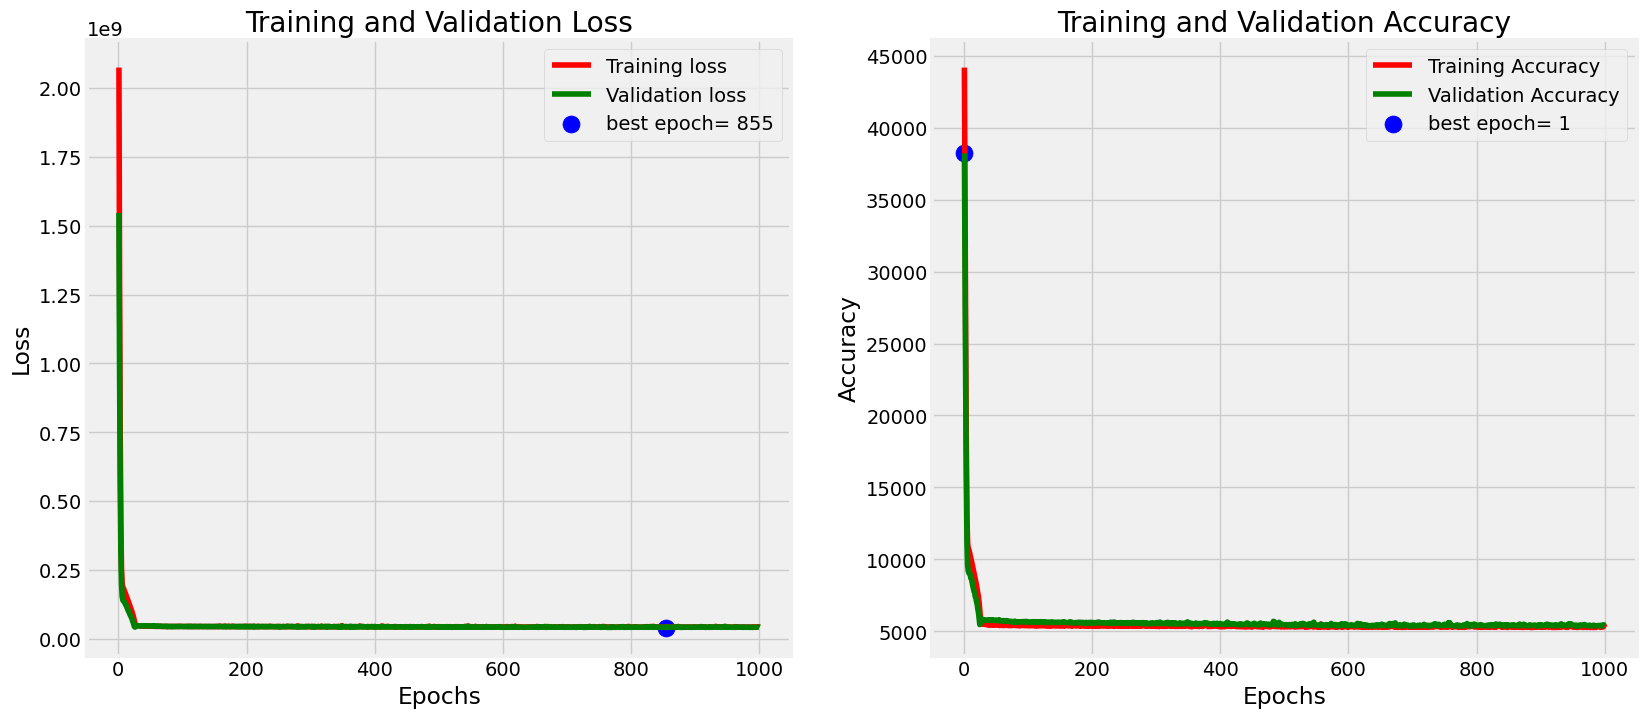

In [34]:
tr_acc = past.history['mean_absolute_error']
tr_loss = past.history['loss']
val_acc = past.history['val_mean_absolute_error']
val_loss = past.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training past
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [35]:
y_pred = ann_model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [36]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.6153025761561076


In [37]:
x_test1=[[41,62812,11609,238961]]
predict1=lr.predict(x_test1)
predict1

array([34603.93964298])

NOTE: - Linear Regression has high Accuracy the ANN Model therefore we will use Linear Regression for this Project.